In [1]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

In [2]:
df = pd.read_excel('sods.xlsx')
df

,idade,genero,etnia,pcd,vive_no_brasil,estado_moradia,nivel_ensino,formacao,tempo_experiencia_dados,linguagens_preferidas,bancos_de_dados,cloud_preferida,cargo
0,39.0,Masculino,Parda,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 1 a 2 anos,R,"PostgreSQL, Oracle, MySQL, SQL SERVER",Amazon Web Services (AWS),DBA/Administrador de Banco de Dados
1,32.0,Masculino,Parda,Não,True,Pará (PA),Graduação/Bacharelado,Outras Engenharias,de 3 a 4 anos,NaN,NaN,NaN,NaN
2,53.0,Masculino,Branca,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Python,"PostgreSQL, MySQL, Oracle, DB2",Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...
3,27.0,Masculino,Branca,Não,True,Minas Gerais (MG),Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,de 4 a 6 anos,Python,Google BigQuery,Não sei opinar,Cientista de Dados/Data Scientist
4,46.0,Feminino,Branca,Não,True,Pará (PA),Pós-graduação,Computação / Engenharia de Software / Sistemas...,Não tenho experiência na área de dados,Python,Microsoft Access,Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,26.0,Masculino,Branca,Não,True,São Paulo (SP),Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Python,"PostgreSQL, Oracle, MariaDB, HBase, MySQL",Não sei opinar,Analista de Dados/Data Analyst
4267,30.0,Feminino,Branca,Não,True,Minas Gerais (MG),Mestrado,Outras Engenharias,de 1 a 2 anos,Python,"SQL SERVER, SAP HANA",Azure (Microsoft),Engenheiro de Dados/Arquiteto de Dados/Data En...
4268,29.0,Masculino,Branca,Não,True,São Paulo (SP),Mestrado,Outras Engenharias,de 4 a 6 anos,NaN,NaN,NaN,NaN
4269,NaN,Masculino,Branca,Não,True,São Paulo (SP),Não tenho graduação formal,NaN,Menos de 1 ano,Python,"Microsoft Access, Oracle",Azure (Microsoft),Outra Opção


In [3]:
df.columns

Index(['idade', 'genero', 'etnia', 'pcd', 'vive_no_brasil', 'estado_moradia',
       'nivel_ensino', 'formacao', 'tempo_experiencia_dados',
       'linguagens_preferidas', 'bancos_de_dados', 'cloud_preferida', 'cargo'],
      dtype='object')

In [4]:
df.shape

(4271, 13)

In [5]:
df.isnull().sum()

idade                        74
genero                        9
etnia                         0
pcd                           0
vive_no_brasil                0
estado_moradia              115
nivel_ensino                  0
formacao                    122
tempo_experiencia_dados     577
linguagens_preferidas      1292
bancos_de_dados            1293
cloud_preferida            1290
cargo                      1290
dtype: int64

### Pré-processamento

In [6]:
# valores ausentes: removendo instâncias de cargo
df = df.dropna(subset=['cargo'])
df.shape

(2981, 13)

In [7]:
df.isnull().sum()

idade                      38
genero                      6
etnia                       0
pcd                         0
vive_no_brasil              0
estado_moradia             72
nivel_ensino                0
formacao                   74
tempo_experiencia_dados     0
linguagens_preferidas       2
bancos_de_dados             3
cloud_preferida             0
cargo                       0
dtype: int64

In [8]:
# valores ausentes: preenchendo com moda
df['formacao'].value_counts()

formacao
Computação / Engenharia de Software / Sistemas de Informação/ TI          1102
Outras Engenharias                                                         697
Economia/ Administração / Contabilidade / Finanças/ Negócios               456
Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais     266
Outra opção                                                                128
Marketing / Publicidade / Comunicação / Jornalismo                          82
Química / Física                                                            69
Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde                      63
Ciências Sociais                                                            44
Name: count, dtype: int64

In [9]:
df['formacao'].fillna('Computação / Engenharia de Software / Sistemas de Informação/ TI', inplace=True)
df.isnull().sum()

C:\Users\roger\AppData\Local\Temp\ipykernel_7284\3562774302.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['formacao'].fillna('Computação / Engenharia de Software / Sistemas de Informação/ TI', inplace=True)
C:\Users\roger\AppData\Local\Temp\ipykernel_7284\3562774302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['formacao'].fi

idade                      38
genero                      6
etnia                       0
pcd                         0
vive_no_brasil              0
estado_moradia             72
nivel_ensino                0
formacao                    0
tempo_experiencia_dados     0
linguagens_preferidas       2
bancos_de_dados             3
cloud_preferida             0
cargo                       0
dtype: int64

In [10]:
df['linguagens_preferidas'].value_counts()

linguagens_preferidas
Python                              2581
R                                    248
Scala                                 35
SQL                                   28
C/C++/C#                              25
Julia                                 17
Sql                                    8
Rust                                   3
Elixir                                 3
sql                                    2
Go                                     2
PySpark                                2
Excel                                  2
NÃO SEI                                1
Clojure                                1
M Language                             1
xlsx                                   1
M                                      1
Spark                                  1
Aql                                    1
Não sei                                1
VBA                                    1
Dax                                    1
Não utilizo                        

In [11]:
df['linguagens_preferidas'].fillna('Python', inplace=True)
df.isnull().sum()

C:\Users\roger\AppData\Local\Temp\ipykernel_7284\4000063210.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['linguagens_preferidas'].fillna('Python', inplace=True)
C:\Users\roger\AppData\Local\Temp\ipykernel_7284\4000063210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['linguagens_preferidas'].fillna('Python', inplace=True)


idade                      38
genero                      6
etnia                       0
pcd                         0
vive_no_brasil              0
estado_moradia             72
nivel_ensino                0
formacao                    0
tempo_experiencia_dados     0
linguagens_preferidas       0
bancos_de_dados             3
cloud_preferida             0
cargo                       0
dtype: int64

In [12]:
df['bancos_de_dados'].value_counts()

bancos_de_dados
Google BigQuery                                           227
SQL SERVER                                                202
MySQL                                                     116
Databricks                                                 71
PostgreSQL                                                 69
                                                         ... 
SAP Business                                                1
PostgreSQL, Oracle, MySQL, SQL SERVER, Google BigQuery      1
MySQL, Amazon Redshift, Hive, Presto                        1
MySQL, Databricks, Hive, DynamoDB, HBase                    1
Hive, Splunk, Sybase, SQL SERVER, Amazon Athena             1
Name: count, Length: 1473, dtype: int64

In [13]:
df['bancos_de_dados'].fillna('Google BigQuery', inplace=True)
df.isnull().sum()

C:\Users\roger\AppData\Local\Temp\ipykernel_7284\1580382709.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bancos_de_dados'].fillna('Google BigQuery', inplace=True)
C:\Users\roger\AppData\Local\Temp\ipykernel_7284\1580382709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bancos_de_dados'].fillna('Google BigQuery', inplace=Tru

idade                      38
genero                      6
etnia                       0
pcd                         0
vive_no_brasil              0
estado_moradia             72
nivel_ensino                0
formacao                    0
tempo_experiencia_dados     0
linguagens_preferidas       0
bancos_de_dados             0
cloud_preferida             0
cargo                       0
dtype: int64

### Seleção das características importantes

In [14]:
df_filtrado = df.drop(columns=['idade', 'genero', 'etnia', 'pcd', 'vive_no_brasil', 'estado_moradia'])

### Binning

In [15]:
pd.set_option("display.max_rows", None)
df_filtrado['bancos_de_dados'].value_counts()

bancos_de_dados
Google BigQuery                                                                                                                                                                                                            230
SQL SERVER                                                                                                                                                                                                                 202
MySQL                                                                                                                                                                                                                      116
Databricks                                                                                                                                                                                                                  71
PostgreSQL                                                                                  

In [16]:
contagem = df_filtrado["bancos_de_dados"].value_counts()

categorias_raras = contagem[contagem < 68].index

df_filtrado.loc[df_filtrado["bancos_de_dados"].isin(categorias_raras), "bancos_de_dados"] = "outros"

df_filtrado['bancos_de_dados'].value_counts()

bancos_de_dados
outros             2225
Google BigQuery     230
SQL SERVER          202
MySQL               116
Databricks           71
PostgreSQL           69
Oracle               68
Name: count, dtype: int64

In [17]:
df_filtrado['linguagens_preferidas'].value_counts()

linguagens_preferidas
Python                              2583
R                                    248
Scala                                 35
SQL                                   28
C/C++/C#                              25
Julia                                 17
Sql                                    8
Rust                                   3
Elixir                                 3
sql                                    2
Go                                     2
PySpark                                2
Excel                                  2
NÃO SEI                                1
Clojure                                1
M Language                             1
xlsx                                   1
M                                      1
Spark                                  1
Aql                                    1
Não sei                                1
VBA                                    1
Dax                                    1
Não utilizo                        

In [18]:
contagem = df_filtrado["linguagens_preferidas"].value_counts()

categorias_raras = contagem[contagem < 8].index

df_filtrado.loc[df_filtrado["linguagens_preferidas"].isin(categorias_raras), "linguagens_preferidas"] = "outros"

df_filtrado['linguagens_preferidas'].value_counts()

linguagens_preferidas
Python      2583
R            248
outros        37
Scala         35
SQL           28
C/C++/C#      25
Julia         17
Sql            8
Name: count, dtype: int64

In [19]:
df_filtrado.columns

Index(['nivel_ensino', 'formacao', 'tempo_experiencia_dados',
       'linguagens_preferidas', 'bancos_de_dados', 'cloud_preferida', 'cargo'],
      dtype='object')

In [20]:
df['nivel_ensino'].value_counts()

nivel_ensino
Graduação/Bacharelado         1143
Pós-graduação                  902
Estudante de Graduação         446
Mestrado                       306
Doutorado ou Phd               110
Não tenho graduação formal      65
Prefiro não informar             9
Name: count, dtype: int64

In [21]:
df['formacao'].value_counts()

formacao
Computação / Engenharia de Software / Sistemas de Informação/ TI          1176
Outras Engenharias                                                         697
Economia/ Administração / Contabilidade / Finanças/ Negócios               456
Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais     266
Outra opção                                                                128
Marketing / Publicidade / Comunicação / Jornalismo                          82
Química / Física                                                            69
Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde                      63
Ciências Sociais                                                            44
Name: count, dtype: int64

In [22]:
contagem = df_filtrado["formacao"].value_counts()

categorias_raras = contagem[contagem < 266].index

df_filtrado.loc[df_filtrado["formacao"].isin(categorias_raras), "formacao"] = "outros"

df_filtrado['formacao'].value_counts()

formacao
Computação / Engenharia de Software / Sistemas de Informação/ TI          1176
Outras Engenharias                                                         697
Economia/ Administração / Contabilidade / Finanças/ Negócios               456
outros                                                                     386
Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais     266
Name: count, dtype: int64

In [23]:
df['tempo_experiencia_dados'].value_counts()

tempo_experiencia_dados
de 1 a 2 anos                             906
de 3 a 4 anos                             608
Menos de 1 ano                            540
de 4 a 6 anos                             370
Mais de 10 anos                           212
de 7 a 10 anos                            187
Não tenho experiência na área de dados    158
Name: count, dtype: int64

In [24]:
df['cloud_preferida'].value_counts()

cloud_preferida
Amazon Web Services (AWS)    1153
Google Cloud (GCP)            721
Não sei opinar                553
Azure (Microsoft)             546
Outra Cloud                     8
Name: count, dtype: int64

In [25]:
df['cargo'].value_counts()

cargo
Analista de Dados/Data Analyst                                         639
Cientista de Dados/Data Scientist                                      556
Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect    490
Analista de BI/BI Analyst                                              378
Outra Opção                                                            281
Analista de Negócios/Business Analyst                                  123
Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas            106
Analista de Suporte/Analista Técnico                                    72
Analytics Engineer                                                      70
Engenheiro de Machine Learning/ML Engineer                              69
Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)                      51
Analista de Inteligência de Mercado/Market Intelligence                 29
Outras Engenharias (não inclui dev)                                     28
Professor          

In [26]:
pd.reset_option("display.max_rows")

### Codificação de categorias

vetorização de categorias

In [27]:
df_filtrado.columns

Index(['nivel_ensino', 'formacao', 'tempo_experiencia_dados',
       'linguagens_preferidas', 'bancos_de_dados', 'cloud_preferida', 'cargo'],
      dtype='object')

In [28]:
# Inicializa o codificador OneHotEncoder para transformar variáveis categóricas em numéricas
ohe_encoder = OneHotEncoder(sparse_output=False)

# Define a lista de colunas categóricas a serem codificadas
categorical_columns = [
    'nivel_ensino',
    'formacao',
    'tempo_experiencia_dados',
    'linguagens_preferidas',
    'bancos_de_dados',
    'cloud_preferida'
]

# Remove a coluna alvo antes de trabalhar nos atributos
df_features = df_filtrado.drop(columns=['cargo'])

# Aplica a codificação One-Hot nas colunas categóricas do conjunto de treinamento
encoded_data = ohe_encoder.fit_transform(df_features[categorical_columns])

# Obtém os nomes das novas colunas geradas pela codificação
new_columns = ohe_encoder.get_feature_names_out(categorical_columns)

# Cria um DataFrame com os dados codificados e os novos nomes de colunas
df_ohe = pd.DataFrame(encoded_data, columns=new_columns)

# Remove as colunas categóricas originais do conjunto de treinamento
df_not_phe = df_features.drop(columns=categorical_columns).reset_index(drop=True)

# Concatena o DataFrame com as colunas codificadas ao DataFrame original
X = pd.concat([df_not_phe, df_ohe], axis=1)

X

,nivel_ensino_Doutorado ou Phd,nivel_ensino_Estudante de Graduação,nivel_ensino_Graduação/Bacharelado,nivel_ensino_Mestrado,nivel_ensino_Não tenho graduação formal,nivel_ensino_Prefiro não informar,nivel_ensino_Pós-graduação,formacao_Computação / Engenharia de Software / Sistemas de Informação/ TI,formacao_Economia/ Administração / Contabilidade / Finanças/ Negócios,formacao_Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais,...,bancos_de_dados_MySQL,bancos_de_dados_Oracle,bancos_de_dados_PostgreSQL,bancos_de_dados_SQL SERVER,bancos_de_dados_outros,cloud_preferida_Amazon Web Services (AWS),cloud_preferida_Azure (Microsoft),cloud_preferida_Google Cloud (GCP),cloud_preferida_Não sei opinar,cloud_preferida_Outra Cloud
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2977,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2978,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2979,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [29]:
X.columns

Index(['nivel_ensino_Doutorado ou Phd', 'nivel_ensino_Estudante de Graduação',
       'nivel_ensino_Graduação/Bacharelado', 'nivel_ensino_Mestrado',
       'nivel_ensino_Não tenho graduação formal',
       'nivel_ensino_Prefiro não informar', 'nivel_ensino_Pós-graduação',
       'formacao_Computação / Engenharia de Software / Sistemas de Informação/ TI',
       'formacao_Economia/ Administração / Contabilidade / Finanças/ Negócios',
       'formacao_Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais',
       'formacao_Outras Engenharias', 'formacao_outros',
       'tempo_experiencia_dados_Mais de 10 anos',
       'tempo_experiencia_dados_Menos de 1 ano',
       'tempo_experiencia_dados_Não tenho experiência na área de dados',
       'tempo_experiencia_dados_de 1 a 2 anos',
       'tempo_experiencia_dados_de 3 a 4 anos',
       'tempo_experiencia_dados_de 4 a 6 anos',
       'tempo_experiencia_dados_de 7 a 10 anos',
       'linguagens_preferidas_C/C++/C#', 'linguagen

In [30]:
X.value_counts()

nivel_ensino_Doutorado ou Phd  nivel_ensino_Estudante de Graduação  nivel_ensino_Graduação/Bacharelado  nivel_ensino_Mestrado  nivel_ensino_Não tenho graduação formal  nivel_ensino_Prefiro não informar  nivel_ensino_Pós-graduação  formacao_Computação / Engenharia de Software / Sistemas de Informação/ TI  formacao_Economia/ Administração / Contabilidade / Finanças/ Negócios  formacao_Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais  formacao_Outras Engenharias  formacao_outros  tempo_experiencia_dados_Mais de 10 anos  tempo_experiencia_dados_Menos de 1 ano  tempo_experiencia_dados_Não tenho experiência na área de dados  tempo_experiencia_dados_de 1 a 2 anos  tempo_experiencia_dados_de 3 a 4 anos  tempo_experiencia_dados_de 4 a 6 anos  tempo_experiencia_dados_de 7 a 10 anos  linguagens_preferidas_C/C++/C#  linguagens_preferidas_Julia  linguagens_preferidas_Python  linguagens_preferidas_R  linguagens_preferidas_SQL  linguagens_preferidas_Scala  linguagens_preferidas_

vetorização de classes

In [31]:
y = df_filtrado['cargo']
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(y)
y = encoded_label
y[:100]

array([ 8,  9,  7,  9, 17,  0,  9,  0, 17,  0,  2,  4,  4,  0, 11,  1, 16,
       11,  7, 14,  9,  7,  1, 11,  0,  9,  0,  4, 11,  7,  5, 11, 14,  7,
        1, 12, 11,  7,  7, 12, 11,  7,  4,  1, 11,  0,  4,  7, 11,  6,  1,
        1, 11, 14,  0,  1,  1, 11,  1,  7,  1,  7, 11, 11,  6,  7, 11,  7,
        1,  1,  5, 11, 14, 14,  0,  0,  1,  0, 14, 11,  1,  0,  1, 12,  1,
        7,  6,  1,  0,  1, 11, 11,  7,  6,  0,  9, 11,  9,  4,  7])

### Separação em treino e teste

In [32]:
TEST_SIZE = 0.3
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=42)


### Treinando o Modelo

In [33]:
modelo = RandomForestClassifier(max_depth=70, max_leaf_nodes=40)
modelo

,n_estimators,100
,criterion,'gini'
,max_depth,70
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,40
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
modelo.fit(X_treino, y_treino)

,n_estimators,100
,criterion,'gini'
,max_depth,70
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,40
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Avaliação

In [35]:
X_teste.shape

(895, 39)

In [36]:
y_teste.shape

(895,)

In [37]:
def evaluate_model(model, X_test, y_test):
 y_pred = model.predict(X_test)
 cm = confusion_matrix(y_test, y_pred)
 ConfusionMatrixDisplay(confusion_matrix=cm).plot()
 plt.show()
 accuracy = accuracy_score(y_test, y_pred)
 f1 = f1_score(y_test, y_pred, average='weighted')
 print(f"Acurácia: {accuracy * 100:.2f}%")
 print(f"F1-score: {f1:.2f}")


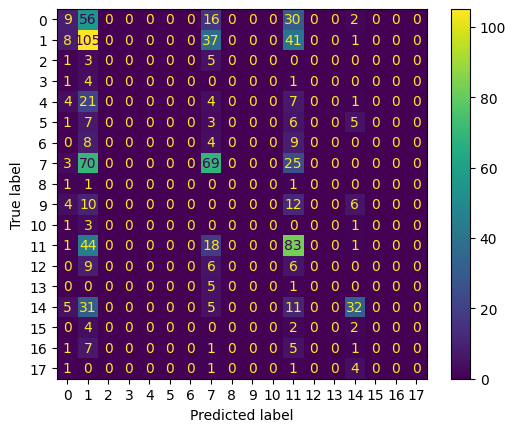

Acurácia: 33.30%
F1-score: 0.28


In [38]:
evaluate_model(modelo, X_teste, y_teste)